<a href="https://colab.research.google.com/github/rgbayao/VibracoesMecanicas/blob/main/Vibracoes_Mecanicas_UFMG2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
np.set_printoptions(suppress=True, precision = 8, linewidth=300)

In [2]:
#Variáveis
matricula = "XXXXXXXX658"
x1 = int(matricula[-1])
x2 = int(matricula[-2])
x3 = int(matricula[-3])
m1 = x3
m2 = x2
m3 = x3
k1 = x1 * 1000
k4 = k1
k2 = x2 * 1000
k5 = k2
k3 = x3 * 1000
k6 = k3
f1 = x1 * 100
f2 = x2 * 100
f3 = x3 * 100
c1 = x1 * 10

In [ ]:
##### Equação de Movimento #####
M = np.array([[x3, 0, 0],[0, x2, 0],[0, 0, x3]])
C = np.array([[c1, 0, 0],[0, 0, 0],[0, 0, 0]])
K = np.array([[k1+k2+k3, -k2-k3, 0],[-k2-k3, k2+k3+k4+k5, -k4-k5],[0, -k4-k5, k4+k5+k6]])
F = np.array([[f1, 0, 0],[0,f2,0],[0,0,f3]])

##### Metodo de vibrações: #####
M1 = np.linalg.inv(M)
char_mat = np.matmul(M1,K)
eigA = np.linalg.eig(char_mat)
Mr1 = eigA[1].T @ M @ eigA[1]
phi = eigA[1] @ np.linalg.inv(np.sqrt(np.diag(np.diag(Mr1))))


##### Método da matriz de estados #####
As = np.concatenate([np.zeros((3,3)), np.eye(3)], axis = 1)
A1 = np.concatenate([-M1 @ K, -M1 @ C], axis = 1)
As = np.concatenate([As,A1], axis = 0)
Bs = np.concatenate([np.zeros((3,3)), np.linalg.inv(M) @ np.eye(3)])
#Bs = np.concatenate([np.zeros((3,3)), np.linalg.inv(M) @ F])
Cs = np.concatenate([np.eye(6), As[3:6,:]])
Ds = np.concatenate([np.zeros((6,3)), Bs[3:6,:]])
eig = np.linalg.eig(As)

def get_wn_zeta(num):
    re = np.real(num)
    im = np.imag(num)
    wn = 100
    var = 1
    zeta1 = -re / wn
    while(abs(var) > 0.00001):
        zeta2 = zeta1
        wn = abs(im / np.sqrt(1 - zeta2 ** 2))
        zeta1 = -re / wn
        var = zeta2 - zeta1
    return [wn, zeta1]

resultados = []
for i in range(0,len(eig[0]),2):
    result = get_wn_zeta(eig[0][i])
    resultados.append(result)
    
##### Reposta Velocidade X Frequencia em Z para entrada Unitária #####
frequencias_de_entrada = np.array([2 * math.pi * i / 10 for i in range(1,200,1)])
freqresp = []
for i in frequencias_de_entrada:
    zs = np.linalg.inv(-(i**2) * np.eye(3) @ M + complex(imag = i) * np.eye(3) @ C + K).dot(np.eye(3).dot(np.array([0,1,0]))) * complex(imag = i)
    freqresp.append(zs[2])
freqresp = np.array([abs(i) for i in freqresp])
plt.figure(figsize = (14,8))
plt.plot(frequencias_de_entrada / (2*math.pi), 20*np.log10(freqresp))
plt.title("Velocidade x Frequencia em z", fontsize = 14)
plt.xlabel("Frequência [Hz]", fontsize = 14)
plt.ylabel("Velocidade [dB]", fontsize = 14)
plt.savefig("f2-z")

##### Reposta Aceleração X Frequencia em X para entrada Unitária #####
freqresp2 = []
for i in frequencias_de_entrada:
    zs = np.linalg.inv(-(i**2) * np.eye(3) @ M + complex(imag = i) * np.eye(3) @ C + K).dot(np.eye(3).dot(np.array([1,0,0]))) * -i**2
    freqresp2.append(zs[0])
freqresp2 = np.array([abs(i) for i in freqresp2])
plt.figure(figsize = (14,8))
plt.plot(frequencias_de_entrada / (2*math.pi), 20*np.log10(freqresp2))
plt.title("Aceleração x Frequencia em x", fontsize = 14)
plt.xlabel("Frequência [Hz]", fontsize = 14)
plt.ylabel("Aceleração [dB]", fontsize = 14)
plt.savefig("f1-x")

##### Verificação do Teorema da Reciprocidade #####
freqresp3 = []
for i in frequencias_de_entrada:
    zs = np.linalg.inv(-(i**2) * np.eye(3) @ M + complex(imag = i) * np.eye(3) @ C + K).dot(np.eye(3).dot(np.array([1,0,0])))
    freqresp3.append(zs[2])
freqresp3 = np.array([abs(i) for i in freqresp3])
freqresp4 = []
for i in frequencias_de_entrada:
    zs = np.linalg.inv(-(i**2) * np.eye(3) @ M + complex(imag = i) * np.eye(3) @ C + K).dot(np.eye(3).dot(np.array([0,0,1])))
    freqresp4.append(zs[0])
freqresp4 = np.array([abs(i) for i in freqresp4])

plt.figure(figsize = (14,8))
plt.plot(frequencias_de_entrada / (2*math.pi), 20*np.log10(freqresp3), 'o')
plt.plot(frequencias_de_entrada / (2*math.pi), 20*np.log10(freqresp4), lw = 2)
plt.title("Deslocamento x Frequencia - Teorema da Reciprocidade", fontsize = 14)
plt.xlabel("Frequência [Hz]", fontsize = 14)
plt.ylabel("Deslocamento [dB]", fontsize = 14)
plt.legend(["Entrada em F1, saída em z", "Entrada em F3, saída em x"], fontsize = 14)
plt.savefig("reciprocidade")

##### Resposta em velocidade em M1 para entrada z = 3 sin(2*pi*10t) #####
Xs = []
for t in np.arange(0,5,0.0001):
    Amp1 = 3
    w1 = 20 * math.pi
    kAmp = phi.T[:,2] * Amp1
    Kc1 = np.array(resultados)[:,0]**2 - w1 **2
    Kc2 = 2 * np.array(resultados)[:,1] * np.array(resultados)[:,0] * w1
    z = [0,0,0]
    z[0] = kAmp[0] * (Kc1[0] * math.sin(w1 * t) - Kc2[0] * math.cos(w1*t)) / (Kc1[0]**2 + Kc2[0]**2)
    z[1] = kAmp[1] * (Kc1[1] * math.sin(w1 * t) - Kc2[1] * math.cos(w1*t)) / (Kc1[1]**2 + Kc2[1]**2)
    z[2] = kAmp[2] * (Kc1[2] * math.sin(w1 * t) - Kc2[2] * math.cos(w1*t)) / (Kc1[2]**2 + Kc2[2]**2)
    X = phi.dot(np.array(z))
    Xs.append(X)
V = []
for i in range(0,len(Xs) - 1):
    V.append((Xs[i+1] - Xs[i]) / 0.0001)
V = np.array(V)
plt.figure(figsize = (16,9))
plt.plot(np.arange(0,5,0.0001)[:],np.array(Xs)[:,0])
plt.title("Velocidade x Tempo - Massa 1 em regime permanente", fontsize = 14)
plt.xlabel("Tempo [s]", fontsize = 14)
plt.ylabel("Velocidade [m/s]", fontsize = 14)
plt.legend(["Fz = 3 * sin(2*pi*10t)"], fontsize = 14)
plt.savefig("resp-temp")

##### Equação de Movimento #####
Matriz de massa
[[6 0 0]
 [0 5 0]
 [0 0 6]]

Matriz de amortecimento
[[80  0  0]
 [ 0  0  0]
 [ 0  0  0]]

Matriz de rigidez
[[ 19000 -11000      0]
 [-11000  24000 -13000]
 [     0 -13000  19000]]

Matriz de força
[[800   0   0]
 [  0 500   0]
 [  0   0 600]]

----------------------------------------------------------------------------------------------------

##### Metodo de vibrações: #####
M^-1
[[0.16666667 0.         0.        ]
 [0.         0.2        0.        ]
 [0.         0.         0.16666667]]

M^-1 * K
[[ 3166.66666667 -1833.33333333     0.        ]
 [-2200.          4800.         -2600.        ]
 [    0.         -2166.66666667  3166.66666667]]

det(M^-1 * K - lambda * I(3))

Auto-valores
[7197.92679303 3166.66666667  768.73987364]

Matriz de auto-vetores: W
[[-0.37185978 -0.76338629  0.49341649]
 [ 0.817671   -0.          0.64536906]
 [-0.43947065  0.64594224  0.58312858]]

Mr
[[ 5.33141414  0.         -0.        ]
 [ 0.          6.       

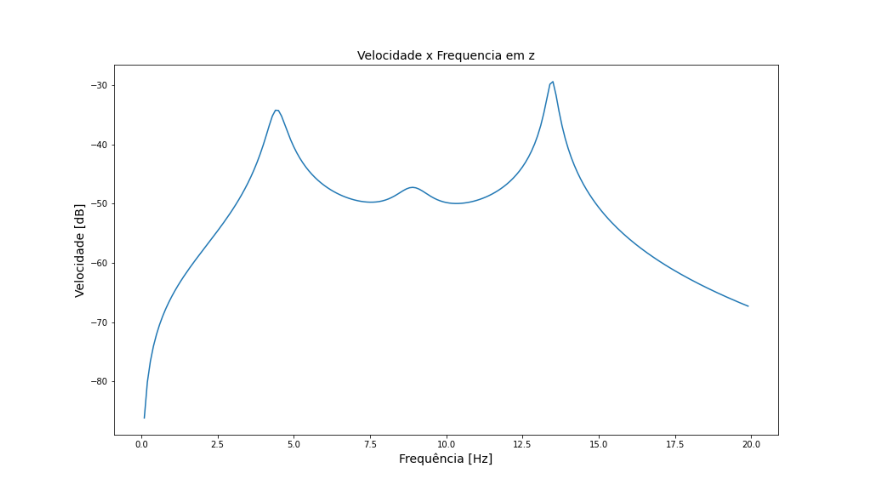


----------------------------------------------------------------------------------------------------

##### Reposta Aceleração X Frequencia em Z para entrada Unitária #####
X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [1,0,0]
Para saída em x, X[0]
Para saída em aceleração X[0] * -(w^2)


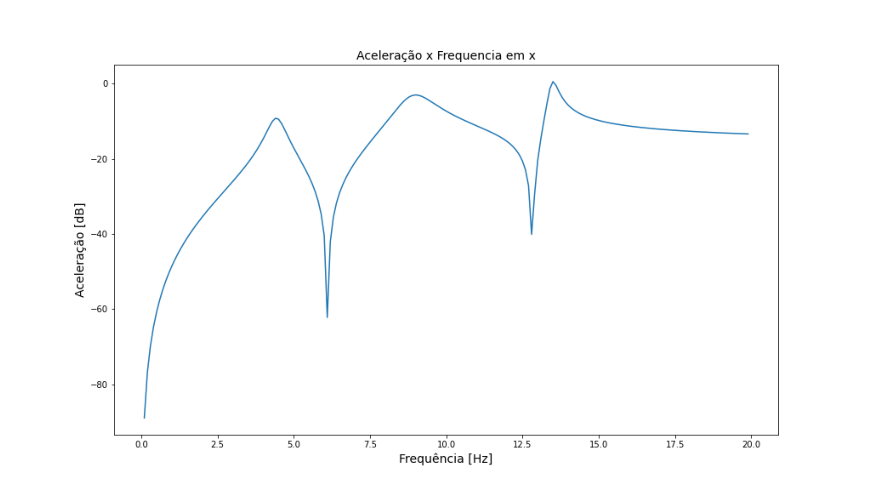


----------------------------------------------------------------------------------------------------

##### Teorema da Reciprocidade #####
Entrada em F1, saída em z:
X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [1,0,0]
Para saída em z, X[2]

Entrada em F3, saída em x:
X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [0,0,1]
Para saída em x, X[0]


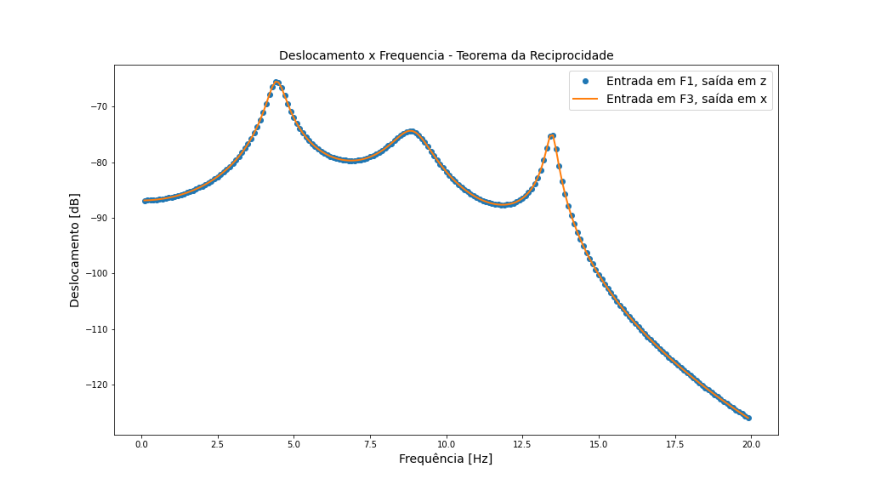


----------------------------------------------------------------------------------------------------

##### Resposta em velocidade em M1 para entrada z = 3 sin(2*pi*10t) #####
Matriz de auto-vetores normalizada pela massa:
[[-0.16104899 -0.31165115  0.2088144 ]
 [ 0.35412565 -0.          0.2731209 ]
 [-0.19033062  0.26370482  0.24678066]]
Realizada a transformação da força para coordenadas modais e solução seguindo equação:
A / M * ((wn^2 - w^2) * sin(wt) - 2*zeta*wn*w*cos(wt)) / ((wn^2 - w^2)^2 + (2*zeta*wn*w)^2)
Após transformação para coordenadas cartesianas (X = phi * Z) e derivada numérica:


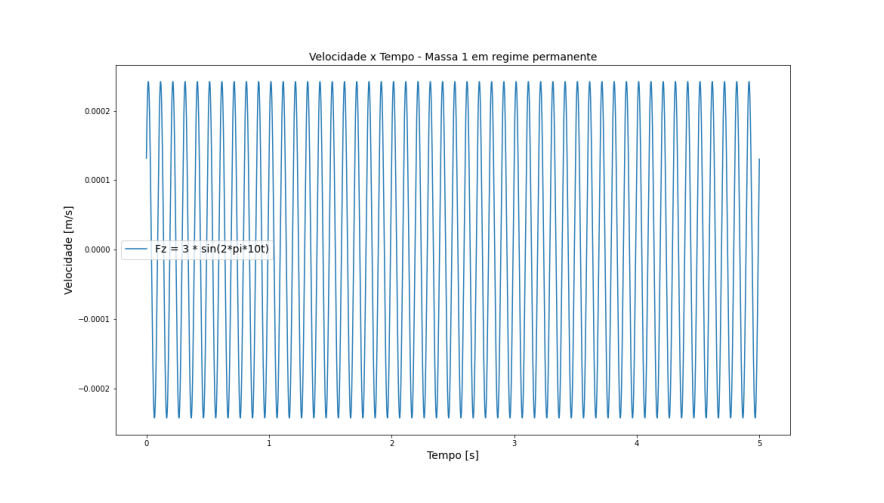

In [4]:
print("##### Equação de Movimento #####")
print("Matriz de massa")
print(M)
print("\nMatriz de amortecimento")
print(C)
print("\nMatriz de rigidez")
print(K)
print("\nMatriz de força")
print(F)
print()
print("-" * 100)
print()

print("##### Metodo de vibrações: #####")
print("M^-1")
print(M1)
print("\nM^-1 * K")
print(char_mat)
print("\ndet(M^-1 * K - lambda * I(3))")
print("\nAuto-valores")
print(eigA[0])
print("\nMatriz de auto-vetores: W")
print(eigA[1])
print("\nMr")
print(Mr1,4)
print("\nMr2 = Mr1^-1 * Mr1 = I(2)")
print("\nKr2 = Mr1^-1 * W.T * K * W = [wn^2]")
print("\nCr2 = Mr1^-1 * W.T * C * W = [wn^2]")
print(np.linalg.inv(Mr1) @ eigA[1].T @ C @ eigA[1])
print("\nMatriz não diagonal, logo é necessário a abordagem por matriz de estado")
print()
print("-" * 100)
print()

print("##### Método da matriz de estados #####")
print("Formato: X' = AX + BU")
print("Formato: Y = CX + DU")
print("Matriz A")
print(As)
print("Matriz B")
print(Bs)
print("Matriz de Respostas C")
print(Cs)
print("Matriz de Ligação D")
print(Ds)
print("\ndet(lambda * I(3) - A)")
print("\nAuto-valores")
print(eig[0])
print("\nMatriz de auto-vetores: W")
print(eig[1])
print("\nMódulo dos auto-vetores de posição únicos (modos de vibração)")
print(abs(eig[1][0:3,::2]))
print("\nFrequencia natural e amortecimento")
print(pd.DataFrame(resultados, columns = ["wn", "zeta"]))
print()
print("-" * 100)
print()

print("##### Reposta Velocidade X Frequencia em Z para entrada Unitária #####")
print("X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [0,1,0]")
print("Para saída em z, X[2]")
print("Para saída em velocidade X[2] * jw")
img4 = mpimg.imread("f2-z.png")
fig = plt.figure(figsize = (16,9))
plt.imshow(img4)
plt.axis('off')
plt.show()
print()
print("-" * 100)
print()

print("##### Reposta Aceleração X Frequencia em Z para entrada Unitária #####")
print("X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [1,0,0]")
print("Para saída em x, X[0]")
print("Para saída em aceleração X[0] * -(w^2)")
img5 = mpimg.imread("f1-x.png")
fig = plt.figure(figsize = (16,9))
plt.imshow(img5)
plt.axis('off')
plt.show()
print()
print("-" * 100)
print()

print("##### Teorema da Reciprocidade #####")
print("Entrada em F1, saída em z:")
print("X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [1,0,0]")
print("Para saída em z, X[2]")
print("\nEntrada em F3, saída em x:")
print("X(s) = (-w^2 * I(3) * M + (-wj) * I(3) * C + K) ^ -1 * [0,0,1]")
print("Para saída em x, X[0]")
img6 = mpimg.imread("reciprocidade.png")
fig = plt.figure(figsize = (16,9))
plt.imshow(img6)
plt.axis('off')
plt.show()
print()
print("-" * 100)
print()

print("##### Resposta em velocidade em M1 para entrada z = 3 sin(2*pi*10t) #####")
print("Matriz de auto-vetores normalizada pela massa:")
print(phi)
print("Realizada a transformação da força para coordenadas modais e solução seguindo equação:")
print("A / M * ((wn^2 - w^2) * sin(wt) - 2*zeta*wn*w*cos(wt)) / ((wn^2 - w^2)^2 + (2*zeta*wn*w)^2)")
print("Após transformação para coordenadas cartesianas (X = phi * Z) e derivada numérica:")
img7 = mpimg.imread("resp-temp.png")
fig = plt.figure(figsize = (16,9))
plt.imshow(img7)
plt.axis('off')
plt.show()